In [1]:
#1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

#Ans

# Install TensorFlow and Keras
!pip install tensorflow
!pip install keras

# Load and print versions
import tensorflow as tf
from keras import __version__ as keras_version

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras_version)

TensorFlow version: 2.13.0
Keras version: 2.13.1


In [2]:
#2. Load the Wine Quality dataset and explore its dimensions.

#Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

#Ans

import pandas as pd

# Load the dataset
data = pd.read_csv("wine_quality_classification.csv")

# Display the dimensions of the dataset (number of rows and columns)
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1599
Number of columns: 12


In [3]:
#3. Check for null values, identify categorical variables, and encode them.

#Ans

import pandas as pd

# Load the dataset
data = pd.read_csv("wine_quality_classification.csv")

# Check for null values
null_counts = data.isnull().sum()
print("Null Value Counts:")
print(null_counts)

# Identify categorical variables
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Variables:")
print(categorical_vars)

# Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)
print("\nEncoded Data:")
print(encoded_data.head())

Null Value Counts:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Categorical Variables:
['quality']

Encoded Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51   

In [4]:
#4. Separate the features and target variables from the dataset.

#Ans

import pandas as pd

# Load the dataset
data = pd.read_csv("wine_quality_classification.csv")

# Separate features and target variable
X = data.drop("quality", axis=1)  # Features
y = data["quality"]  # Target variable

# Display the first few rows of features and target variable
print("Features:")
print(X.head())

print("\nTarget Variable:")
print(y.head())

Features:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4 

In [5]:
#5. Perform a train-test split, dividing the data into training, validation, and test datasets.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("wine_quality_classification.csv")

# Separate features and target variable
X = data.drop("quality", axis=1)  # Features
y = data["quality"]  # Target variable

# Split the data into training, validation, and test datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the datasets
print("Training dataset shape:", X_train.shape)
print("Validation dataset shape:", X_val.shape)
print("Test dataset shape:", X_test.shape)

Training dataset shape: (1119, 11)
Validation dataset shape: (240, 11)
Test dataset shape: (240, 11)


In [6]:
#6. Scale the dataset using an appropriate scaling technique.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("wine_quality_classification.csv")

# Separate features and target variable
X = data.drop("quality", axis=1)  # Features
y = data["quality"]  # Target variable

# Split the data into training, validation, and test datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform all datasets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of scaled training data
print("Scaled Training Data:")
print(X_train_scaled[:5, :])

Scaled Training Data:
[[ 1.69536131e-01 -1.72107140e+00  4.59303345e-01 -4.54281813e-01
  -5.03192118e-01  3.61097191e+00  9.09502082e-01 -4.01203069e-01
   1.01180685e+00  1.22661179e+00  5.50057013e-01]
 [ 2.44606730e+00 -4.01957443e-01  1.84105501e+00 -3.84209259e-01
  -3.54641111e-01 -9.66099468e-01 -9.68038212e-01  1.09923481e+00
  -2.10687612e+00  1.22661179e+00 -2.05174641e-01]
 [-6.47680186e-01  3.77472102e-02 -1.28054303e-03  3.62260706e-02
  -7.87606704e-02 -3.81792484e-01  9.39784989e-01 -2.05493781e-01
   4.92026353e-01  2.97270776e-01  5.50057013e-01]
 [-1.11466094e+00  7.52267272e-01 -9.73624306e-01 -3.14136704e-01
  -9.06401994e-01  2.99898997e-01  3.12977507e-02 -1.02094915e+00
   1.14175197e+00 -9.80573115e-01  9.27672840e-01]
 [-4.72562403e-01  2.57599537e-01 -6.66568381e-01 -2.44064149e-01
  -2.27311677e-01  1.07897498e+00  3.94692646e-01 -2.59857472e-01
  -2.22671827e-01 -3.99734983e-01 -5.82790468e-01]]


In [7]:
#7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
data = pd.read_csv("wine_quality_classification.csv")

# Separate features and target variable
X = data.drop("quality", axis=1)  # Features
y = data["quality"]  # Target variable

# Convert "quality" to binary labels (good/bad)
y = y.apply(lambda label: 1 if label == "good" else 0)

# Split the data into training, validation, and test datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the scaler and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
                    epochs=20, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
35/35 [==============================] - 1s 6ms/step - loss: 0.6152 - accuracy: 0.6997 - val_loss: 0.5934 - val_accuracy: 0.6917
Epoch 2/20
35/35 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7489 - val_loss: 0.5663 - val_accuracy: 0.6958
Epoch 3/20
35/35 [==============================] - 0s 3ms/step - loss: 0.5098 - accuracy: 0.7551 - val_loss: 0.5680 - val_accuracy: 0.6750
Epoch 4/20
35/35 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7605 - val_loss: 0.5616 - val_accuracy: 0.6875
Epoch 5/20
35/35 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7632 - val_loss: 0.5672 - val_accuracy: 0.6750
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.7694 - val_loss: 0.5682 - val_accuracy: 0.6708
Epoch 7/20
35/35 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7721 - val_loss: 0.5593 - val_accuracy: 0.6875
Epoch 8/20
35/35 [==

In [8]:
#8. Create a Sequential model in Keras and add the previously designed layers to it.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
data = pd.read_csv("wine_quality_classification.csv")

# Separate features and target variable
X = data.drop("quality", axis=1)  # Features
y = data["quality"]  # Target variable

# Convert "quality" to binary labels (good/bad)
y = y.apply(lambda label: 1 if label == "good" else 0)

# Split the data into training, validation, and test datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the scaler and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the Sequential model and add layers
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#9. Print the summary of the model architecture.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
data = pd.read_csv("wine_quality_classification.csv")

# Separate features and target variable
X = data.drop("quality", axis=1)  # Features
y = data["quality"]  # Target variable

# Convert "quality" to binary labels (good/bad)
y = y.apply(lambda label: 1 if label == "good" else 0)

# Split the data into training, validation, and test datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the scaler and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the Sequential model and add layers
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
#10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
data = pd.read_csv("wine_quality_classification.csv")

# Separate features and target variable
X = data.drop("quality", axis=1)  # Features
y = data["quality"]  # Target variable

# Convert "quality" to binary labels (good/bad)
y = y.apply(lambda label: 1 if label == "good" else 0)

# Split the data into training, validation, and test datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the scaler and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Number of input features
input_dim = X_train_scaled.shape[1]

# Build the Sequential model and add layers
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                768       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#11. Compile the model with the specified loss function, optimizer, and metrics.

#Ans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
data = pd.read_csv("wine_quality_classification.csv")

# Separate features and target variable
X = data.drop("quality", axis=1)  # Features
y = data["quality"]  # Target variable

# Convert "quality" to binary labels (good/bad)
y = y.apply(lambda label: 1 if label == "good" else 0)

# Split the data into training, validation, and test datasets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the scaler and fit it on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Number of input features
input_dim = X_train_scaled.shape[1]

# Build the Sequential model and add layers
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
35/35 [==============================] - 1s 7ms/step - loss: 0.6411 - accuracy: 0.6497 - val_loss: 0.6020 - val_accuracy: 0.6792
Epoch 2/20
35/35 [==============================] - 0s 3ms/step - loss: 0.5496 - accuracy: 0.7507 - val_loss: 0.5792 - val_accuracy: 0.6958
Epoch 3/20
35/35 [==============================] - 0s 3ms/step - loss: 0.5142 - accuracy: 0.7498 - val_loss: 0.5820 - val_accuracy: 0.6917
Epoch 4/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7632 - val_loss: 0.5758 - val_accuracy: 0.6833
Epoch 5/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7676 - val_loss: 0.5723 - val_accuracy: 0.6750
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.7739 - val_loss: 0.5674 - val_accuracy: 0.6833
Epoch 7/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7766 - val_loss: 0.5706 - val_accuracy: 0.6833
Epoch 8/20
35/35 [==

In [3]:
#12. Fit the model to the training data using appropriate batch size and number of epochs.

#Ans

# Fit the model to the training data
batch_size = 32
epochs = 20

history = model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val_scaled, y_val))

Epoch 1/20
35/35 [==============================] - 0s 7ms/step - loss: 0.4394 - accuracy: 0.7945 - val_loss: 0.5457 - val_accuracy: 0.7125
Epoch 2/20
35/35 [==============================] - 0s 5ms/step - loss: 0.4355 - accuracy: 0.7945 - val_loss: 0.5465 - val_accuracy: 0.7208
Epoch 3/20
35/35 [==============================] - 0s 6ms/step - loss: 0.4343 - accuracy: 0.7971 - val_loss: 0.5457 - val_accuracy: 0.7125
Epoch 4/20
35/35 [==============================] - 0s 6ms/step - loss: 0.4337 - accuracy: 0.7980 - val_loss: 0.5507 - val_accuracy: 0.7083
Epoch 5/20
35/35 [==============================] - 0s 5ms/step - loss: 0.4278 - accuracy: 0.7989 - val_loss: 0.5448 - val_accuracy: 0.7167
Epoch 6/20
35/35 [==============================] - 0s 5ms/step - loss: 0.4252 - accuracy: 0.7971 - val_loss: 0.5548 - val_accuracy: 0.7042
Epoch 7/20
35/35 [==============================] - 0s 5ms/step - loss: 0.4257 - accuracy: 0.8034 - val_loss: 0.5579 - val_accuracy: 0.7042
Epoch 8/20
35/35 [==

In [25]:
#13. Obtain the model's parameters (weights and biases).

#Ans

# Get the model's parameters
model_parameters = []
for layer in model.layers:
    layer_params = layer.get_weights()
    model_parameters.append(layer_params)

# Print the parameters
for i, params in enumerate(model_parameters):
    print(f"Layer {i+1} parameters:")
    for j, param in enumerate(params):
        print(f"  Parameter {j+1}:")
        print(param)

Layer 1 parameters:
  Parameter 1:
[[ 0.10230295  0.09797948 -0.04970869  0.24349679  0.28030092 -0.17722954
  -0.03152697 -0.27961582  0.03524763 -0.10105184  0.19239956  0.05527383
   0.3316428  -0.19545898 -0.15376863 -0.17790458  0.14042884 -0.08059344
  -0.022557   -0.23658513  0.2242995  -0.09841785  0.03532488  0.2231343
  -0.07281788  0.0439011   0.10004762 -0.1733903  -0.12604588 -0.16729325
  -0.19512649 -0.02935982  0.23683457  0.08230114  0.0241786   0.16749382
  -0.04434021  0.08276238 -0.13099027  0.1929163  -0.05505695  0.24124978
  -0.04205203  0.07819109 -0.08818804  0.04096943  0.23672636 -0.2572766
  -0.12029283 -0.18913941 -0.17321467 -0.21886261 -0.1063326  -0.04570053
   0.05613085  0.21480349  0.26320624  0.00176185 -0.15557967  0.0541239
   0.20572083  0.06808887 -0.24984373 -0.14233872]
 [-0.04319187  0.02238302  0.18947612 -0.06229433 -0.08284326 -0.09847735
  -0.247377   -0.00064529  0.0408022   0.27352276 -0.1443153   0.15158305
  -0.17227678 -0.01907206 -0.

In [24]:
#14. Store the model's training history as a Pandas DataFrame.

#Ans

import pandas as pd

# Convert the training history dictionary to a DataFrame
history_df = pd.DataFrame(history.history)

# Display the DataFrame
print(history_df)

        loss  accuracy  val_loss  val_accuracy
0   0.641055  0.649687  0.602027      0.679167
1   0.549569  0.750670  0.579209      0.695833
2   0.514226  0.749777  0.582041      0.691667
3   0.499797  0.763181  0.575843      0.683333
4   0.492573  0.767650  0.572322      0.675000
5   0.484215  0.773905  0.567445      0.683333
6   0.479739  0.776586  0.570586      0.683333
7   0.474203  0.773012  0.563649      0.695833
8   0.469575  0.785523  0.554433      0.708333
9   0.464634  0.783735  0.553726      0.700000
10  0.459648  0.784629  0.554357      0.704167
11  0.456930  0.786416  0.548321      0.725000
12  0.452330  0.795353  0.553882      0.708333
13  0.449102  0.792672  0.550326      0.720833
14  0.447093  0.798034  0.553324      0.712500
15  0.444337  0.794459  0.544176      0.733333
16  0.439451  0.794459  0.550655      0.712500
17  0.438890  0.797140  0.550660      0.704167
18  0.437075  0.796247  0.544080      0.729167
19  0.433021  0.798928  0.542199      0.720833


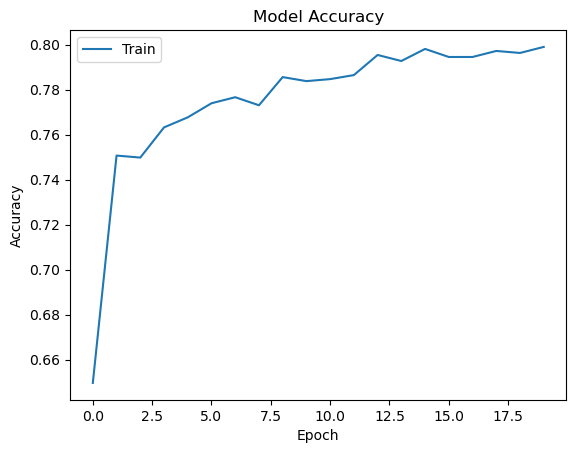

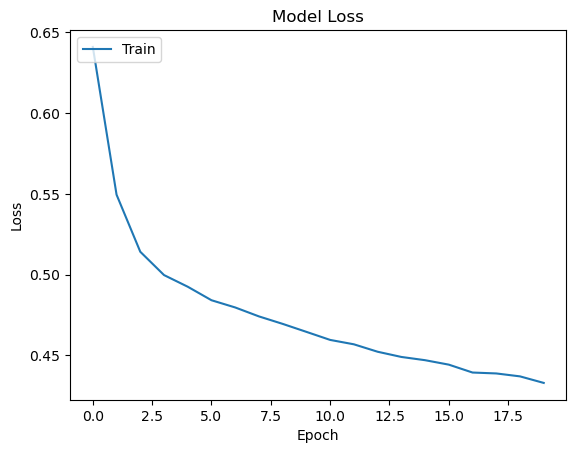

In [23]:
#15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

#Ans

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper left')
plt.show()

In [22]:
#16. Evaluate the model's performance using the test dataset and report relevant metrics.

#Ans

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the dataset
data = pd.read_csv("wine_quality_classification.csv")

# Step 1: Preprocessing
X = data.drop(columns=['quality'])  # Features
y = data['quality']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Convert target variable to one-hot encoding
y_train_onehot = pd.get_dummies(y_train)
y_test_onehot = pd.get_dummies(y_test)

# Step 4: Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_onehot.shape[1], activation='softmax'))

# Step 5: Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 6: Train the model
model.fit(X_train_scaled, y_train_onehot, epochs=10, batch_size=32)

# Step 7: Evaluate the model's performance using the test dataset
y_pred_probabilities = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(np.argmax(y_test_onehot.values, axis=1), y_pred_labels)
precision = precision_score(np.argmax(y_test_onehot.values, axis=1), y_pred_labels, average='weighted')
recall = recall_score(np.argmax(y_test_onehot.values, axis=1), y_pred_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Epoch 1/10
40/40 [==============================] - 1s 2ms/step - loss: 0.5985 - accuracy: 0.6849
Epoch 2/10
40/40 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7396
Epoch 3/10
40/40 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7529
Epoch 4/10
40/40 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7623
Epoch 5/10
40/40 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7701
Epoch 6/10
40/40 [==============================] - 0s 1ms/step - loss: 0.4872 - accuracy: 0.7709
Epoch 7/10
40/40 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7772
Epoch 8/10
40/40 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7756
Epoch 9/10
40/40 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7787
Epoch 10/10
10/10 [==============================] - 0s 1ms/step
Accuracy: 0.753125
Precision: 0.7563449639724311
Reca